In [87]:
import logging
logging.root.setLevel(logging.INFO)


In [88]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [89]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


class MazeScenario(Scenario):
    
    def __init__(self, training_cycles=5000, input_size=8):
        self.input_size = input_size
        self.maze = gym.make('Maze5-v0')
        self.possible_actions = (0, 1, 2, 3, 4, 5, 6, 7)
        self.done = False
        self.state = None
        self.reward = 0
        self.state = self.maze.reset()
        self.remaining_cycles = training_cycles
        
        self.steps_array = []
        self.steps = 0

    def reset(self):
        self.done = False
        self.state = self.maze.reset()
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return no_reward_state
        
    # XCS Hosford42 functions
    @property
    def is_dynamic(self):
        return False
        
    def get_possible_actions(self):
        return self.possible_actions
        
    def more(self):
        if self.done:
            self.reset()
            self.remaining_cycles -= 1
            self.steps_array.append(self.steps)
            self.steps = 0
            self.reset()
        return self.remaining_cycles >=0
        
    def sense(self):
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return BitString(''.join(no_reward_state))
    
    def execute(self, action):
        self.steps += 1
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.reward

    # XCS Pyalcs functions
    def step(self, action):
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return no_reward_state, self.reward, self.done, _

In [90]:
training_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(training_cycles, input_size)

In [91]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.minimum_actions = 8
algorithm.wildcard_probability = 0.33

In [92]:
model = algorithm.new_model(scenario)
model.run(scenario, learn=True)


In [93]:
print(model)


1##00### => 2
    Time Stamp: 41014
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.022999553415708432
    Experience: 1
    Action Set Size: 21.0
    Numerosity: 1
01##1110 => 0
    Time Stamp: 40846
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.025739267377184717
    Experience: 0
    Action Set Size: 1
    Numerosity: 1
#0#10##1 => 2
    Time Stamp: 41047
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.03532705735752422
    Experience: 0
    Action Set Size: 1
    Numerosity: 1
#1##0### => 2
    Time Stamp: 40993
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.03555680321671701
    Experience: 4
    Action Set Size: 16.25
    Numerosity: 1
####0#0# => 2
    Time Stamp: 41047
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.035794351621771796
    Experience: 1
    Action Set Size: 25.0
    Numerosity: 1
#####0#1 => 6
    Time Stamp: 40953
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.056701109794600135
    Experience: 12
    Action Set Size: 17.

In [94]:
print(len(model))

47


In [95]:
for rule in model:
    if rule.fitness > .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

######## => 1  [0.83638]
######## => 5  [0.96765]
######## => 6  [0.69983]
######## => 4  [0.97973]
######## => 3  [0.98585]
######## => 7  [0.12025]
######## => 0  [0.12313]
1111001# => 0  [0.92055]
#######1 => 0  [0.72051]
#######1 => 6  [0.22547]
#0##001# => 0  [0.70614]
010010#0 => 0  [0.35763]
#0###### => 7  [0.80544]
##0##### => 2  [0.88854]
##0##### => 6  [0.21265]
#1###### => 7  [0.80628]
#0##0000 => 2  [0.36170]
00#01#00 => 2  [0.69339]
1#1##1#1 => 2  [0.34390]
#01##010 => 2  [0.70162]
####0### => 2  [0.27780]
011110#0 => 2  [0.40951]
####011# => 2  [0.30005]
#0#10#01 => 2  [0.45740]
01#10001 => 2  [0.27100]
#11100#0 => 2  [0.14000]
####01## => 2  [0.18093]
######0# => 0  [0.66854]
######0# => 1  [0.21451]
01##1#10 => 0  [0.25739]
#0##0### => 7  [0.11058]
#######0 => 5  [0.06695]
#0##00## => 0  [0.16840]
#####11# => 2  [0.31146]
0110#110 => 0  [0.10000]
01###### => 7  [0.11346]
###1##0# => 0  [0.06593]
####0#1# => 2  [0.09532]
#####0#1 => 6  [0.05670]
#1##1### => 7  [0.09568]


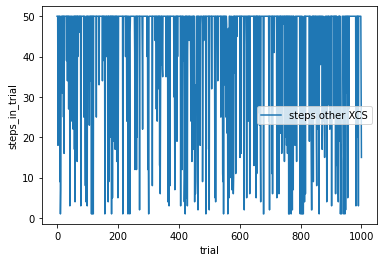

In [96]:
import pandas as pd

df = pd.DataFrame(scenario.steps_array)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

In [97]:
from lcs.agents.xcs import XCS, Configuration

cfg = Configuration(number_of_actions=algorithm.minimum_actions,
                    covering_wildcard_chance=1-algorithm.wildcard_probability)
                    


In [98]:
agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(scenario, training_cycles, False)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [3.5458819443170502e-40, 2.7966545038025775e-40, 1.5492520166586155e-40, 1.903331325803806e-40, 3.959521862898773e-40, 2.9618140894520446e-40, 4.89543647546747e-40, 2.971438723585207e-40], 'perf_time': 0.011805800000047384}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': [9.88415481322027, 11.250242979256113, 17.97076378051483, 24.665175577055436, 11.641579763570055, 13.317150449980259, 14.972595645496263, 11.116344929060189], 'perf_time': 0.0195018000000573}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': [28.238993444742675, 18.630495493221684, 17.65614878763527, 18.692484176723404, 16.58626833602353, 19.839874692752673, 14.65539885611724, 20.297262641060957], 'perf_time': 0.01980530000003}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': [48.64348099122837, 43.681012110733114, 34.79335523377832, 49.580587901602854, 48.32621368119546, 56.06416665998499, 42.

In [99]:
for rule in explore_population:
    print(rule)


Cond:#11#0#1# - Act:0 - Num:1 [fit: 0.000, exp: 811.00, pred: 139.989]
Cond:#00##00# - Act:1 - Num:1 [fit: 0.000, exp: 68.00, pred: 138.394]
Cond:##001##0 - Act:3 - Num:1 [fit: 0.062, exp: 255.00, pred: 146.085]
Cond:#01001## - Act:0 - Num:1 [fit: 0.000, exp: 509.00, pred: 153.848]
Cond:00#001#1 - Act:4 - Num:1 [fit: 0.000, exp: 513.00, pred: 152.691]
Cond:01#1###1 - Act:0 - Num:1 [fit: 0.042, exp: 1437.00, pred: 149.846]
Cond:#101#111 - Act:3 - Num:1 [fit: 0.003, exp: 490.00, pred: 145.712]
Cond:#1###### - Act:4 - Num:1 [fit: 0.096, exp: 3964.00, pred: 142.491]
Cond:#10#1#01 - Act:6 - Num:1 [fit: 0.001, exp: 824.00, pred: 153.839]
Cond:#0###111 - Act:7 - Num:1 [fit: 0.090, exp: 710.00, pred: 138.327]
Cond:###10##1 - Act:2 - Num:1 [fit: 0.045, exp: 1425.00, pred: 138.645]
Cond:00#10#11 - Act:3 - Num:1 [fit: 0.017, exp: 232.00, pred: 138.210]
Cond:#10#1111 - Act:1 - Num:1 [fit: 0.000, exp: 147.00, pred: 127.779]
Cond:#00#11#0 - Act:4 - Num:1 [fit: 0.003, exp: 32.00, pred: 144.546]
Cond:

In [100]:
print(len(explore_population))

142


In [101]:
for rule in explore_population:
    if rule.fitness >= .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

##001##0 => 3  [0.06193]
#1###### => 4  [0.09629]
#0###111 => 7  [0.09041]
11000111 => 6  [0.08771]
#10010#1 => 5  [0.46941]
101#000# => 7  [0.14190]
1#1101#0 => 0  [0.13834]
111##10# => 6  [0.19484]
00##0010 => 5  [0.23633]
10000#01 => 0  [0.05420]
11##1### => 0  [0.22465]
####0#1# => 7  [0.23132]
10111100 => 0  [0.13786]
10000101 => 6  [0.43257]
01###0## => 7  [0.20321]
101##0#0 => 3  [0.09789]
##0#01## => 7  [0.15950]
01#1###1 => 5  [0.28100]
###01101 => 7  [0.06617]
111#0100 => 7  [0.34929]
1101##0# => 6  [0.30947]
1#0#1100 => 6  [0.16675]
#10####0 => 1  [0.06425]
0#0#11#0 => 3  [0.05360]
#10##100 => 6  [0.18843]
0#1001## => 6  [0.15214]
1#101101 => 1  [0.07331]
101##100 => 2  [0.12535]
1#11#1## => 2  [0.23578]
#110110# => 2  [0.40761]
1###0##1 => 0  [0.54873]
001#00#0 => 4  [0.06171]
10#100#0 => 6  [0.09003]
1##10### => 3  [0.12674]
#0###010 => 2  [0.07482]
00###01# => 0  [0.25558]
#1#01101 => 5  [0.05166]
11#0#11# => 1  [0.37327]
11#0#1#1 => 3  [0.42743]


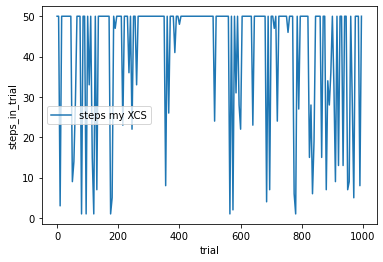

In [102]:
import pandas as pd

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
df['trial'] = df.index * cfg.metrics_trial_frequency
df.set_index('trial', inplace=True)

ax = df.plot()
ax.set_xlabel("trial") 
ax.set_ylabel("steps_in_trial")
ax.legend(["steps my XCS"])

#### Conclusions
After code review of both classifiers and Algorithmic Description of XCS I found that implementation of Generate Match Set of Hosford42 creates only one classifier if match_set lenght is lower than theta_mna. 
<br />
Meanwhile in my implementation and Algorithmic Description of XCS the Generate Match Set creates multiple covering classifiers until match set is equal to theta_mna.